In [1]:
import time

import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
device_lib.list_local_devices()

In [2]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()
strategy = tf.distribute.MirroredStrategy(devices=["/GPU:0", "/GPU:3"])

INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO


In [3]:
class simpleCNN():
    def __init__(self):
        (self.X_train, self.Y_train), (self.X_test, self.Y_test) = load_data()
        self.X_train = self.X_train.astype("float32") / 255
        self.X_test = self.X_test.astype("float32") / 255
        self.model = self.modeling()

    def modeling(self):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28)))
        model.add(Dense(128, activation="relu"))
        model.add(Dense(10, activation="softmax"))

        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        return model

    def train(self, epoch):
        history = self.model.fit(self.X_train, self.Y_train, validation_data=(self.X_test, self.Y_test), batch_size=64, epochs=epoch)
        return history

In [4]:
times = time.time()
with strategy.scope():
    model = simpleCNN()
history = model.train(100)
times = time.time() - times

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2609 - accuracy: 0.9254 - val_loss: 0.1445 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1167 - accuracy: 0.9656 - val_loss: 0.1014 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0802 - accuracy: 0.9759 - val_loss: 0.0960 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0862 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0868 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0771 - val_accuracy:

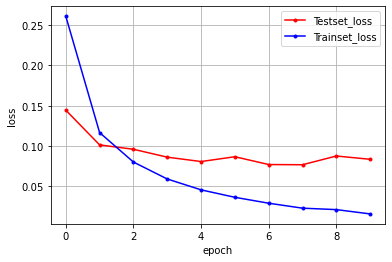

In [5]:
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig(f"{round(times, 4)}.png")